# Heart Disease Prediction

## Task: To predict the chances of getting heart disease based on various health factors

### Heart disease describes a range of conditions that affect your heart. Diseases under the heart disease umbrella include blood vessel diseases, such as coronary artery disease, heart rhythm problems (arrhythmias) and heart defects you’re born with (congenital heart defects), among others.                                                          Heart disease is one of the biggest causes of morbidity and mortality among the population of the world. Prediction of cardiovascular disease is regarded as one of the most important subjects in the section of clinical data analysis. The amount of data in the healthcare industry is huge. Data mining turns the large collection of raw healthcare data into information that can help to make informed decisions and predictions.                         According to a news article, heart disease proves to be the leading cause of death for both women and men. The article states the following :                                                                                                                                            About 610,000 people die of heart disease in the United States every year–that’s 1 in every 4 deaths.1                   Heart disease is the leading cause of death for both men and women. More than half of the deaths due to heart disease in 2009 were in men.1                                                                                                                                   Coronary Heart Disease(CHD) is the most common type of heart disease, killing over 370,000 people annually.      Every year about 735,000 Americans have a heart attack. Of these, 525,000 are a first heart attack and 210,000 happen in people who have already had a heart attack.                                                                                                 This makes heart disease a major concern to be dealt with. But it is difficult to identify heart disease because of several contributory risk factors such as diabetes, high blood pressure, high cholesterol, abnormal pulse rate, and many other factors. Due to such constraints, we used Machine Learning for predicting the disease.


### Step 1: Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

### Step 2: Loading Dataset

In [2]:
df = pd.read_csv("Heart_Disease_Prediction.csv")

### Step 3: Having a look at the dataset

In [3]:
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


### Step 4: Top 5 and Bottom 5 data from the dataset

In [4]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [5]:
df.tail()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence
269,67,1,4,160,286,0,2,108,1,1.5,2,3,3,Presence


### Step 5: Shape of the dataset

In [6]:
df.shape

(270, 14)

### Step 6: Details of the dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

### Step 7: Checking for null values

In [8]:
df.isna().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

### Step 8: Looking at the columns of the dataset

In [9]:
df.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

### Step 9: Understanding the dataset

In [10]:
df.dtypes

Age                          int64
Sex                          int64
Chest pain type              int64
BP                           int64
Cholesterol                  int64
FBS over 120                 int64
EKG results                  int64
Max HR                       int64
Exercise angina              int64
ST depression              float64
Slope of ST                  int64
Number of vessels fluro      int64
Thallium                     int64
Heart Disease               object
dtype: object

In [11]:
df['Heart Disease'].count()

270

In [12]:
df['Heart Disease'].value_counts()

Absence     150
Presence    120
Name: Heart Disease, dtype: int64

In [13]:
df['Heart Disease'].value_counts(normalize=True)*100

Absence     55.555556
Presence    44.444444
Name: Heart Disease, dtype: float64

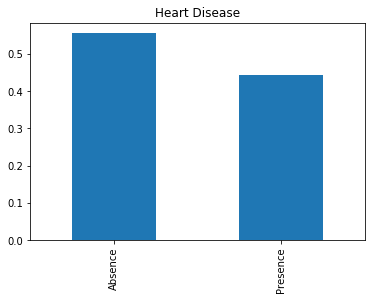

In [14]:
df['Heart Disease'].value_counts(normalize=True).plot.bar(title='Heart Disease')

### Step 10: Analysis of Age variable

In [15]:
df['Age'].count()

270

In [16]:
df['Age'].value_counts()

54    16
58    15
51    12
57    12
59    12
60    12
62    11
52    11
44    10
41     9
56     9
64     9
65     8
67     8
42     8
63     7
61     7
43     7
45     7
53     7
46     7
50     7
48     7
66     6
55     6
49     5
47     4
70     4
69     3
35     3
71     3
68     3
40     3
39     3
37     2
34     2
77     1
38     1
76     1
74     1
29     1
Name: Age, dtype: int64

In [17]:
df['Age'].value_counts(normalize=True)*100

54    5.925926
58    5.555556
51    4.444444
57    4.444444
59    4.444444
60    4.444444
62    4.074074
52    4.074074
44    3.703704
41    3.333333
56    3.333333
64    3.333333
65    2.962963
67    2.962963
42    2.962963
63    2.592593
61    2.592593
43    2.592593
45    2.592593
53    2.592593
46    2.592593
50    2.592593
48    2.592593
66    2.222222
55    2.222222
49    1.851852
47    1.481481
70    1.481481
69    1.111111
35    1.111111
71    1.111111
68    1.111111
40    1.111111
39    1.111111
37    0.740741
34    0.740741
77    0.370370
38    0.370370
76    0.370370
74    0.370370
29    0.370370
Name: Age, dtype: float64

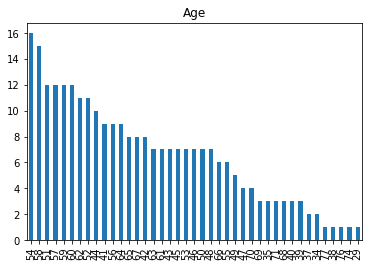

In [18]:
df['Age'].value_counts().plot.bar(title='Age')

### Step 11: Analysis of Sex variable

In [19]:
df['Sex'].count()

270

In [20]:
df['Sex'].value_counts()

1    183
0     87
Name: Sex, dtype: int64

In [21]:
df['Sex'].value_counts(normalize=True)*100

1    67.777778
0    32.222222
Name: Sex, dtype: float64

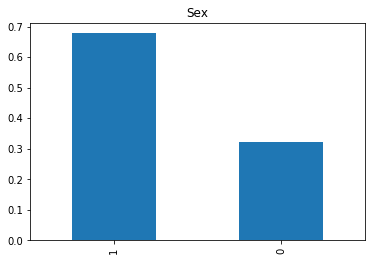

In [22]:
df['Sex'].value_counts(normalize=True).plot.bar(title='Sex')

### Step 12: Analysis of Chest Pain Type variable

In [23]:
df['Chest pain type'].count()

270

In [24]:
df['Chest pain type'].value_counts()

4    129
3     79
2     42
1     20
Name: Chest pain type, dtype: int64

In [25]:
df['Chest pain type'].value_counts(normalize=True)*100

4    47.777778
3    29.259259
2    15.555556
1     7.407407
Name: Chest pain type, dtype: float64

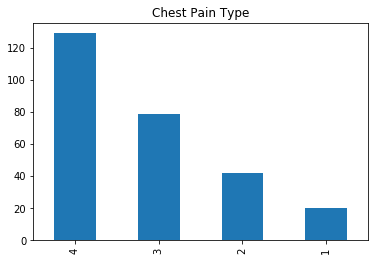

In [26]:
df['Chest pain type'].value_counts().plot.bar(title='Chest Pain Type')

### Step 13: Checking for outliers

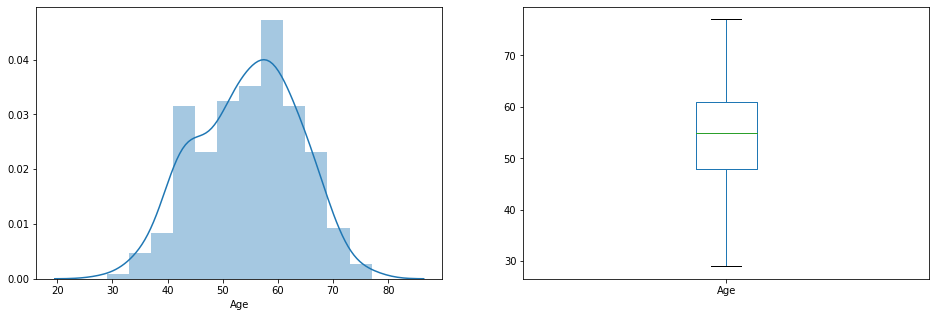

In [27]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df['Age'])

plt.subplot(122)
df['Age'].plot.box(figsize=(16,5))
plt.show()

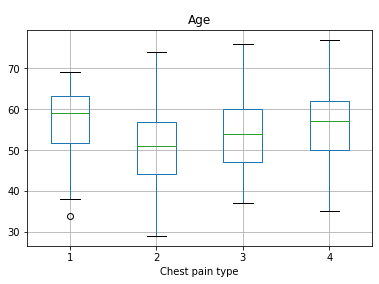

In [28]:
df.boxplot(column='Age',by='Chest pain type')
plt.suptitle(" ")
plt.show()

In [29]:
#print(pd.crosstab(train["Gender"],train["Loan_Status"]))
#Gender = pd.crosstab(train["Gender"],train["Loan_Status"])
#Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
#plt.xlabel("Gender")
#plt.ylabel("Percentage")
#plt.show()

### Step 14: Visualizing the Chest Pain type

Heart Disease    Absence  Presence
Chest pain type                   
1                     15         5
2                     35         7
3                     62        17
4                     38        91


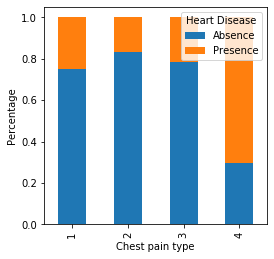

In [30]:
print(pd.crosstab(df['Chest pain type'],df['Heart Disease']))
Sex = pd.crosstab(df['Chest pain type'],df['Heart Disease'])
Sex.div(Sex.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Chest pain type")
plt.ylabel("Percentage")
plt.show()

In [31]:
#train.groupby("Loan_Status")['ApplicantIncome'].mean().plot.bar()

### Step 15: Visualizing the Heart Disease gender wise

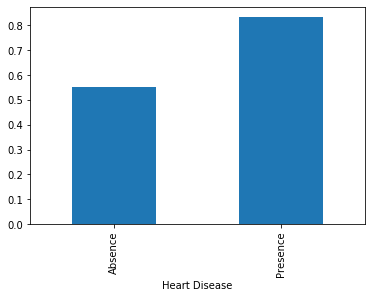

In [32]:
df.groupby("Heart Disease")['Sex'].mean().plot.bar()

In [33]:
df.isna().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

### Step 16: Label Encoding the non numeric columns

In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [35]:
dfle = df
dfle['Presence'] = le.fit_transform(dfle['Heart Disease'])
dfle.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease,Presence
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence,0


In [36]:
dfle = dfle.drop('Heart Disease',axis='columns')

In [37]:
dfle.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Presence
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


### Step 17: Separating out the dependent and independent columns

In [38]:
x = dfle.drop('Presence',axis='columns')
y = dfle.Presence

### Step 18: Splitting the dataset into train and test set

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

### Step 19: Training the model

#### Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()

In [41]:
model1.fit(x_train,y_train)

C:\Users\soham\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
print("The Accuracy using Logistic Regression is :", (model1.score(x_test,y_test))*100)

The Accuracy using Logistic Regression is : 80.24691358024691


#### Decesion Tree

In [43]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier()

In [44]:
model2.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [45]:
print("The Accuracy using Decision Tree is :", (model2.score(x_test,y_test))*100)

The Accuracy using Decision Tree is : 67.90123456790124


#### Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier()

In [47]:
model3.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [48]:
print("The Accuracy using Random Forest is :", (model3.score(x_test,y_test))*100)

The Accuracy using Random Forest is : 75.30864197530865


#### SVM

In [49]:
from sklearn.svm import SVC
model4 = SVC()

In [50]:
model4.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [51]:
print("The Accuracy using SVM is :", (model4.score(x_test,y_test))*100)

The Accuracy using SVM is : 60.49382716049383


#### Naive_Bayes

In [52]:
from sklearn.naive_bayes import GaussianNB
model5 = GaussianNB()

In [53]:
model5.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [54]:
print("The Accuracy using Naive Bayes is :", (model5.score(x_test,y_test))*100)

The Accuracy using Naive Bayes is : 77.77777777777779


#### XGBoost

In [55]:
from xgboost import XGBClassifier
model6 = XGBClassifier()

In [56]:
model6.fit(x_train,y_train)

C:\Users\soham\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:47:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [57]:
print("The Accuracy using XGBoost is :", (model6.score(x_test,y_test))*100)

The Accuracy using XGBoost is : 72.8395061728395


### Step 20: Getting accuracy of various models used

In [58]:
print("1. Logistic Regression: ",model1.score(x_test,y_test)*100)
print("2. Decision Tree      : ",model2.score(x_test,y_test)*100)
print("3. Random Forest      : ",model3.score(x_test,y_test)*100)
print("4. SVM                : ",model4.score(x_test,y_test)*100)
print("5. Naive Bayes        : ",model5.score(x_test,y_test)*100)
print("6. XGBoost            : ",model6.score(x_test,y_test)*100)

1. Logistic Regression:  80.24691358024691
2. Decision Tree      :  67.90123456790124
3. Random Forest      :  75.30864197530865
4. SVM                :  60.49382716049383
5. Naive Bayes        :  77.77777777777779
6. XGBoost            :  72.8395061728395


### Step 21: Cross val score function

In [59]:
from sklearn.model_selection import cross_val_score

#### Logistic regression model performance using cross_val_score</h5>

In [60]:
cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), x_train, y_train,cv=3)

array([0.87301587, 0.82539683, 0.85714286])

#### svm model performance using cross_val_score</h5>

In [61]:
cross_val_score(SVC(gamma='auto'), x_train, y_train,cv=3)

array([0.55555556, 0.53968254, 0.53968254])

#### random forest performance using cross_val_score</h5>

In [62]:
cross_val_score(RandomForestClassifier(n_estimators=40),x_train, y_train,cv=3)

array([0.85714286, 0.82539683, 0.87301587])

#### decision tree performance using cross_val_score</h5>

In [63]:
cross_val_score(DecisionTreeClassifier(),x_train, y_train,cv=3)

array([0.80952381, 0.85714286, 0.82539683])

#### Naiyes Bayes performance using cross_val_score</h5>

In [64]:
cross_val_score(GaussianNB(),x_train, y_train,cv=3)

array([0.9047619 , 0.80952381, 0.84126984])

#### xgboost performance using cross_val_score</h5>

In [65]:
cross_val_score(XGBClassifier(),x_train, y_train,cv=3)

[01:47:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:47:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:47:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\soham\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


array([0.88888889, 0.82539683, 0.84126984])

In [66]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

### Step 22: Selecting the best model

In [67]:
model_params = {
    'svm': {
        'model': svm.SVC(),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {}
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],
            
        }
    },
    'xgboost': {
        'model': XGBClassifier(),
        'params':{}
    }
}

In [68]:
from sklearn.model_selection import GridSearchCV
import pandas as pd
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

C:\Users\soham\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:48:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:48:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:48:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:48:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

,model,best_score,best_params
0,svm,0.841394,"{'C': 20, 'kernel': 'linear'}"
1,random_forest,0.820057,{'n_estimators': 10}
2,logistic_regression,0.841536,{'C': 1}
3,naive_bayes_gaussian,0.841110,{}
4,decision_tree,0.788193,{'criterion': 'entropy'}
5,xgboost,0.825320,{}


### Step 23: Making Predictions on test dataset

In [69]:
y_predicted = model5.predict(x_test)
y_predicted

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1])

### Step 24: Visualizing the score

In [70]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predicted)
cm

array([[39,  8],
       [10, 24]], dtype=int64)

Text(33.0, 0.5, 'Truth')

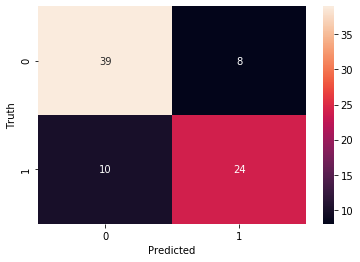

In [71]:
import seaborn as sb
plt.figure(figsize=(6,4))
sb.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [72]:

print('Confusion matrix \n')
print(metrics.confusion_matrix(y_test,y_predicted))
print('*'*80)
print('\n')
print('Classification report \n')
print(metrics.classification_report(y_test,y_predicted))

Confusion matrix 

[[39  8]
 [10 24]]
********************************************************************************


Classification report 

              precision    recall  f1-score   support

           0       0.80      0.83      0.81        47
           1       0.75      0.71      0.73        34

    accuracy                           0.78        81
   macro avg       0.77      0.77      0.77        81
weighted avg       0.78      0.78      0.78        81



### End